### from [Kaggle:](https://www.kaggle.com/datasets/thebumpkin/700-classic-disco-tracks-with-spotify-data/data)

### This dataset is a vibrant collection of 724 tracks from 101 artists, capturing the essence and evolution of disco music over the decades. Disco, with its infectious rhythms, lush orchestrations, and pulsating beats, defined an era of dance and celebration from the late 1960s through the early 1980s. This genre brought people together on dance floors worldwide, fostering a sense of community and joy.

### The tracks in this dataset span the full spectrum of disco's history, from its roots in the underground dance scenes of New York City to its mainstream explosion in the 1970s, epitomized by legendary clubs like Studio 54. Each record in the dataset is enriched with Spotify audio features, providing detailed insights into the musical attributes that made disco a cultural phenomenon. These features include metrics such as danceability, energy, tempo, and more, offering a deep dive into the soundscape of disco.

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [18]:
disco = pd.read_csv("ClassicDisco.csv")

### Examine the data.

In [19]:
disco.head()

,Track,Artist,Album,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity
0,Boogie Oogie Oogie,A Taste Of Honey,A Taste Of Honey,1978,245173,4,0.797,0.548,2,-9.228,0,0.0492,0.0401,0.000010,0.0994,0.868,123.686,53
1,Disco Dancin' - 2004 - Remastered,A Taste Of Honey,A Taste Of Honey,1978,210493,4,0.751,0.570,2,-11.645,1,0.0813,0.3710,0.000020,0.1230,0.770,103.408,11
2,Distant,A Taste Of Honey,A Taste Of Honey,1978,260053,4,0.468,0.512,2,-10.187,1,0.1380,0.7820,0.000020,0.2020,0.714,163.400,13
3,Do It Good,A Taste Of Honey,Another Taste (Expanded Edition),1978,342826,4,0.699,0.740,3,-8.625,0,0.0289,0.0714,0.000002,0.1650,0.889,104.168,17
4,If We Loved,A Taste Of Honey,A Taste Of Honey,1978,266200,4,0.463,0.459,6,-11.600,1,0.0296,0.7640,0.000003,0.1580,0.300,129.267,13


In [20]:
disco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             724 non-null    object 
 1   Artist            724 non-null    object 
 2   Album             724 non-null    object 
 3   Year              724 non-null    int64  
 4   Duration          724 non-null    int64  
 5   Time_Signature    724 non-null    int64  
 6   Danceability      724 non-null    float64
 7   Energy            724 non-null    float64
 8   Key               724 non-null    int64  
 9   Loudness          724 non-null    float64
 10  Mode              724 non-null    int64  
 11  Speechiness       724 non-null    float64
 12  Acousticness      724 non-null    float64
 13  Instrumentalness  724 non-null    float64
 14  Liveness          724 non-null    float64
 15  Valence           724 non-null    float64
 16  Tempo             724 non-null    float64
 1

In [21]:
import seaborn as sns

### Examine relationships between select numerical columns.

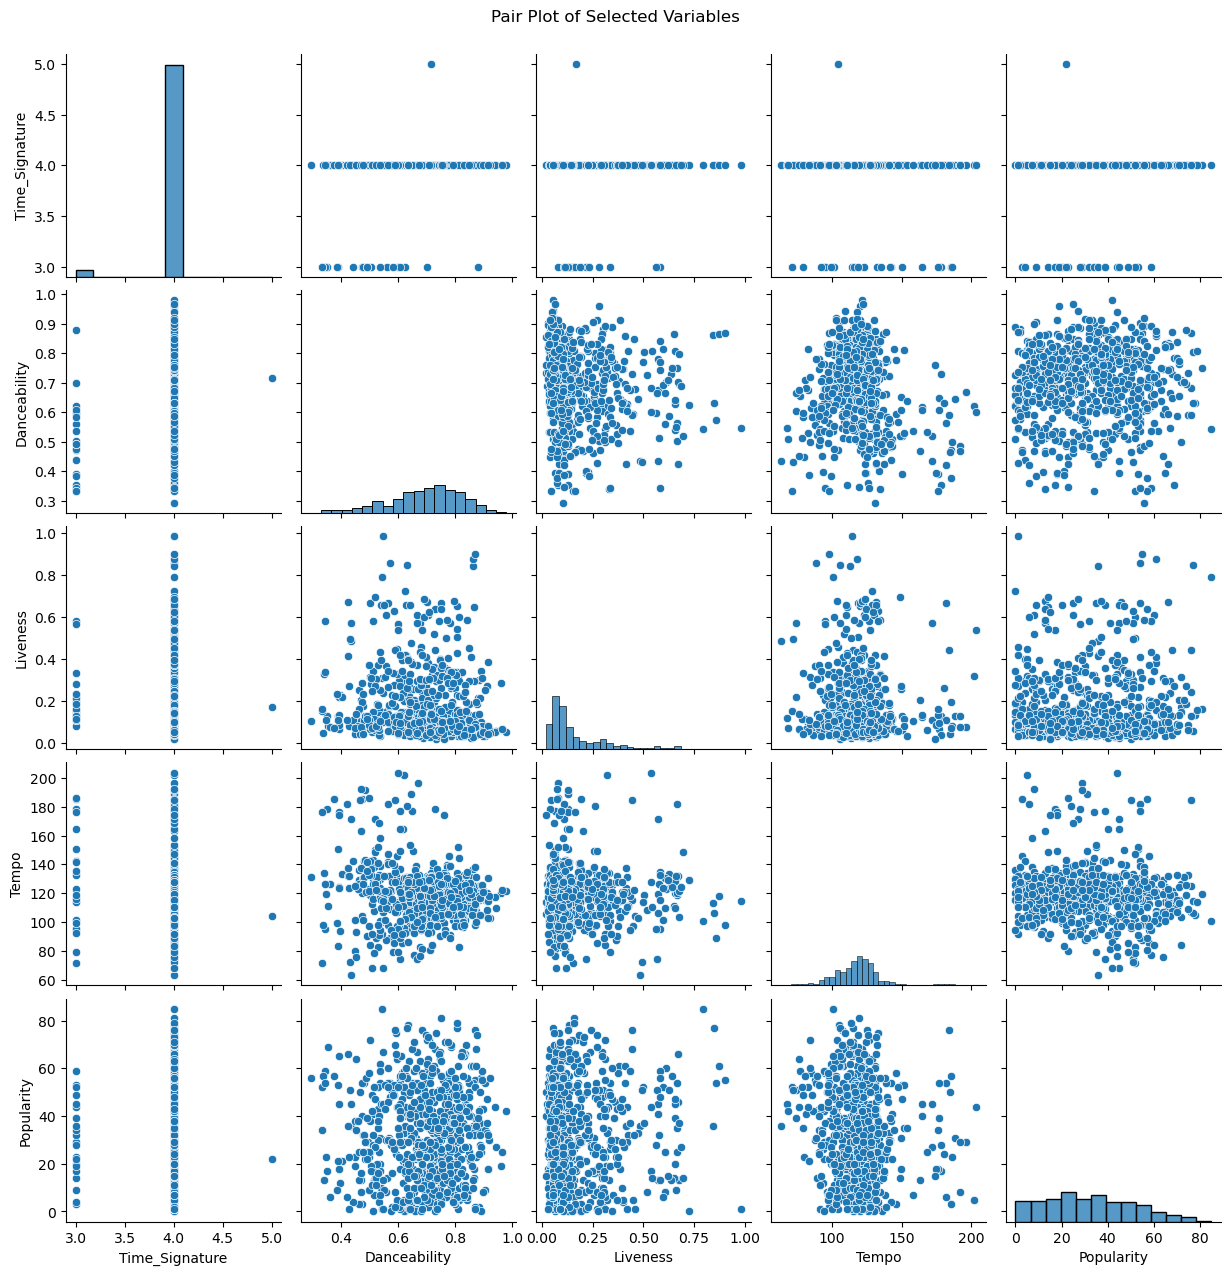

In [22]:
selected_columns = ['Time_Signature', 'Danceability', 'Liveness', 'Tempo', 'Popularity']
sns.pairplot(disco[selected_columns])
plt.suptitle('Pair Plot of Selected Variables', y=1.02)
plt.show()

### When Tempo (on the horizontal axis) is compared to Danceability (on the vertical), there appears to be a hump near the 120 BPM (beats per minute) mark. Let's take a closer look.

<Axes: xlabel='Tempo', ylabel='Danceability'>

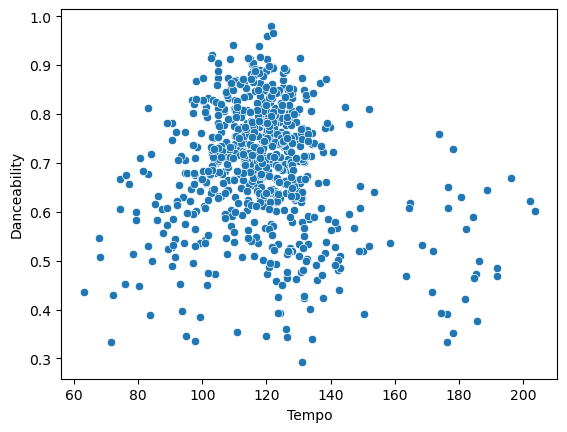

In [23]:
sns.scatterplot(data=disco, x = "Tempo", y = "Danceability")

### Danceability seems to be increasing up to the 120 BPM mark and then falling off after that point. 120 BPM, some of older folks will recall, is considered the "canonical" tempo for disco songs.

### Split the data into two dataframes, one where Tempo is up to and including 120 BPM, the other where it is above 120 BPM.

In [24]:
lesseq120 = disco["Tempo"] <= 120

In [25]:
discoto120 = disco[lesseq120]

<Axes: xlabel='Tempo', ylabel='Danceability'>

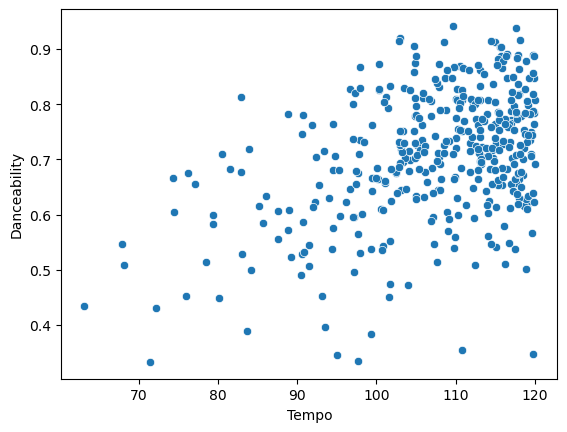

In [26]:
sns.scatterplot(data=discoto120, x = "Tempo", y = "Danceability")

In [27]:
over120 = disco["Tempo"] > 120

In [28]:
discoover120 = disco[over120]

<Axes: xlabel='Tempo', ylabel='Danceability'>

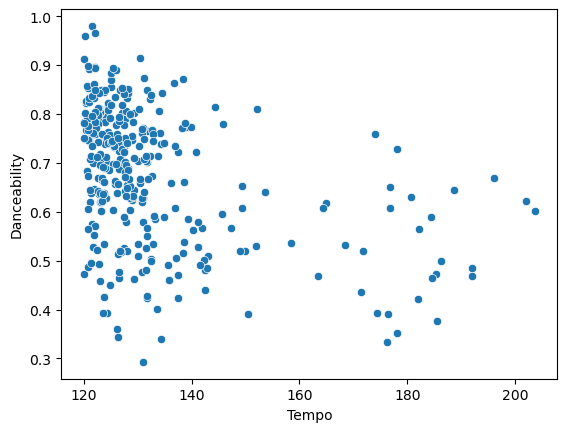

In [29]:
sns.scatterplot(data=discoover120, x = "Tempo", y = "Danceability")

### Draw a regression line for each half of the Tempo vs Danceability data.

<Axes: xlabel='Tempo', ylabel='Danceability'>

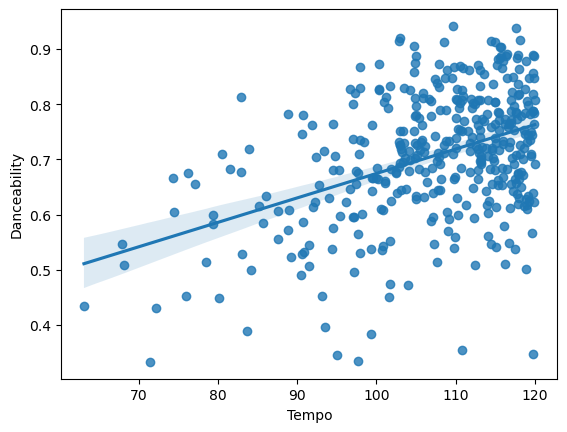

In [30]:
sns.regplot(data=discoto120, x = "Tempo", y = "Danceability")

<Axes: xlabel='Tempo', ylabel='Danceability'>

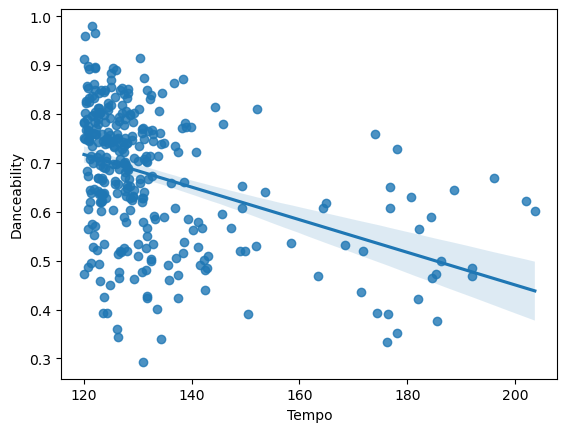

In [31]:
sns.regplot(data=discoover120, x = "Tempo", y = "Danceability")

### The difference in the slopes of the two plots is clear.

In [32]:
import scipy.stats

In [33]:
discoto120.to_csv("discoto120.csv")

In [34]:
discoover120.to_csv("discoover120.csv")

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [38]:
modelto120 = sm.OLS.from_formula('Danceability ~ Tempo', data = discoto120)
resultsto120 = modelto120.fit()
print(resultsto120.params)

Intercept    0.231338
Tempo        0.004432
dtype: float64


In [39]:
modelover120 = sm.OLS.from_formula('Danceability ~ Tempo', data = discoover120)
resultsover120 = modelover120.fit()
print(resultsover120.params)

Intercept    1.117139
Tempo       -0.003333
dtype: float64


### Again, we can see that the coefficients for Tempo in the two model-halves are of similar magnitudes but opposite signs.

In [40]:
discoto120final = discoto120[["Tempo", "Danceability"]]

In [41]:
discoover120final = discoover120[["Tempo", "Danceability"]]

In [42]:
discoto120final.corr(method='pearson', numeric_only=True)

,Tempo,Danceability
Tempo,1.000000,0.419847
Danceability,0.419847,1.000000


In [43]:
discoover120final.corr(method='pearson', numeric_only=True)

,Tempo,Danceability
Tempo,1.00000,-0.40181
Danceability,-0.40181,1.00000


### Now we can see that the regression equation for Tempo up to 120 BPM has a coefficient of 0.42 on Danceability, while when 120 BPM is exceeded the coefficient on Danceability is -0.40. 

### There really is something "magic" about the 120 BPM mark.